# Project: Investigate medical no-shows dataset


## First steps & Data Wrangling

Importing libraries and loading csv file, parsing two columns as dates

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv', parse_dates=["ScheduledDay","AppointmentDay"])
print(df.head())

      PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04+00:00   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31+00:00   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23+00:00   

             AppointmentDay  Age      Neighbourhood  Scholarship  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  
0             1         0           0        0             0      No  
1             0         0           0        0

# 2. What are the steps to be taken as part of the analysis?

1. Check overall proportion of no-show
2. Check whether any of variables has a higher proportion than other

# 3. With a focus on questions below (but not limited to):
1. Is there a difference between scheduled day and appointment day - do patients that make an appointment much in advance tend not to show up?
2. Is alcoholism influencing whether patients show up more often or not?
3. Are we increasing chances of patient showing up if we're sending reminders?
4. Are there any patients that have a pattern of not showing up? Should we focus on some patients and send them reminders about the visit?

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

>There are **110527** rows in a dataset


>There are **no nulls** in none of the columns


>Column "PatientID" has a float type - this will be changed to **str**, and zero at the end will be stripped

In [3]:
df['PatientId'] = df['PatientId'].astype(str).str.rstrip('.0')
#check whether change has been done
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  object             
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [4]:
#add a column with weekday, in order to later on check whether weekday has any influence of no-shows
df['ApointmentWeekday'] = df['AppointmentDay'].dt.strftime("%A")

In [5]:
#extract date from ScheduledDay and AppointmentDay columns

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], errors='coerce').dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], errors='coerce').dt.date

#add 23h 59 mins and 59 sec to time of appointment, as all appointmentDates are as midnight
df['AppointmentDay'] = df['AppointmentDay'] + pd.Timedelta('1d') - pd.Timedelta('1s')

#calculate difference in days between Scheduled day and Appointment Day
df['Scheduled'] = (df['AppointmentDay']-df['ScheduledDay']).dt.days

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   PatientId          110527 non-null  object
 1   AppointmentID      110527 non-null  int64 
 2   Gender             110527 non-null  object
 3   ScheduledDay       110527 non-null  object
 4   AppointmentDay     110527 non-null  object
 5   Age                110527 non-null  int64 
 6   Neighbourhood      110527 non-null  object
 7   Scholarship        110527 non-null  int64 
 8   Hipertension       110527 non-null  int64 
 9   Diabetes           110527 non-null  int64 
 10  Alcoholism         110527 non-null  int64 
 11  Handcap            110527 non-null  int64 
 12  SMS_received       110527 non-null  int64 
 13  No-show            110527 non-null  object
 14  ApointmentWeekday  110527 non-null  object
 15  Scheduled          110527 non-null  int64 
dtypes: int64(9), object(

In [6]:
df.head(15)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ApointmentWeekday,Scheduled
0,29872499824296,5642903,F,2016-04-29,2016-04-30,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,1
1,558997776694438,5642503,M,2016-04-29,2016-04-30,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,1
2,4262962299951,5642549,F,2016-04-29,2016-04-30,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,1
3,867951213174,5642828,F,2016-04-29,2016-04-30,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,1
4,8841186448183,5642494,F,2016-04-29,2016-04-30,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,1
5,95985133231274,5626772,F,2016-04-27,2016-04-30,76,REPÚBLICA,0,1,0,0,0,0,No,Friday,3
6,733688164476661,5630279,F,2016-04-27,2016-04-30,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Friday,3
7,3449833394123,5630575,F,2016-04-27,2016-04-30,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Friday,3
8,56394729949972,5638447,F,2016-04-29,2016-04-30,21,ANDORINHAS,0,0,0,0,0,0,No,Friday,1
9,78124564369297,5629123,F,2016-04-27,2016-04-30,19,CONQUISTA,0,0,0,0,0,0,No,Friday,3


In [7]:
df.describe()

#to be checked: age -1 and max 115, scheduled less than zero, handcap max =4 when it was supposed to be boolean value

,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Scheduled
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,11.183702
std,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000
25%,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,16.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,180.000000


>to be checked after this step: 
**Age** of -1 and 115;
**Scheduled** column less than 0;
**handcap** max = 4, when it was supposed to be boolean value?

In [8]:
#check for outlier Age = -1

df.loc[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ApointmentWeekday,Scheduled
99832,465943158731293,5775010,F,2016-06-06,2016-06-07,-1,ROMÃO,0,0,0,0,0,0,No,Monday,1


In [9]:
#check for potential outlier where Age > 100

df.loc[df['Age'] > 100]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ApointmentWeekday,Scheduled
58014,976294799775439,5651757,F,2016-05-03,2016-05-04,102,CONQUISTA,0,0,0,0,0,0,No,Tuesday,1
63912,31963211613981,5700278,F,2016-05-16,2016-05-20,115,ANDORINHAS,0,0,0,0,1,0,Yes,Thursday,4
63915,31963211613981,5700279,F,2016-05-16,2016-05-20,115,ANDORINHAS,0,0,0,0,1,0,Yes,Thursday,4
68127,31963211613981,5562812,F,2016-04-08,2016-05-17,115,ANDORINHAS,0,0,0,0,1,0,Yes,Monday,39
76284,31963211613981,5744037,F,2016-05-30,2016-05-31,115,ANDORINHAS,0,0,0,0,1,0,No,Monday,1
90372,234283596548,5751563,F,2016-05-31,2016-06-03,102,MARIA ORTIZ,0,0,0,0,0,0,No,Thursday,3
97666,748234579244724,5717451,F,2016-05-19,2016-06-04,115,SÃO JOSÉ,0,1,0,0,0,1,No,Friday,16


Although the age of 115 seems unlikely, looks like these patients are all female (which tend to live longer), and the oldest people were living even up to 122 years, so I'm not going to delete these entries

In [10]:
df.loc[df['Scheduled'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ApointmentWeekday,Scheduled
71533,998231581612122,5686628,F,2016-05-11,2016-05-06,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,Thursday,-5


Looks like incorrect entry, so I'll filter this out

In [11]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

This caught my attention as it was supposed to be a boolean value. Nevertheless as checked on kaggle the creator says it's a total value of handicap that a patient has - as higher number may mean more problems with actually getting to facility, I have decided not to change values in the column

In [12]:
#filtering out outliers/incorrect entries

df = df.query('Age>-1 and Scheduled>=0')

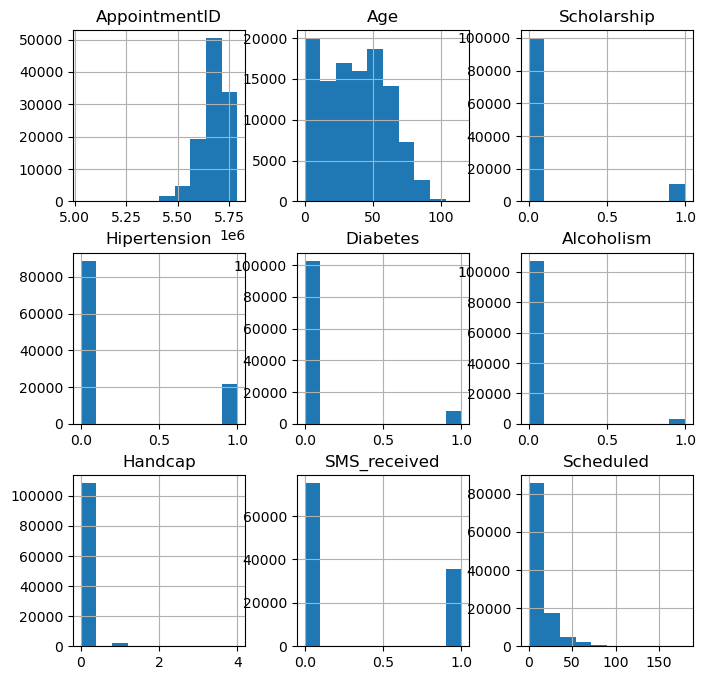

In [13]:
df.hist(figsize= (8,8));

>Quick check of distribution of variables:


>out of conditions included in dataset, hipertension seems to be most common


>We have around 10k patients that are part of social programme


>Around 50% of patients are receiving messages with reminders


>most of patients are scheduling their appointments up to 50 days in advance

In [14]:
#creating age groups
bins= [0,2,4,13,18,30,40,50,60,115]
labels = ['Infant','Toddler','Kid','Teen','Young Adult',"30+","40+","50+","60+"]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [15]:
#creating buckets for how much in advance was the appointment scheduled
bins= [0,2,7,14,28,180]
labels = ['the same or next day','<1 week','<2 weeks','<1 month','>1 month']
df['ScheduledGroup'] = pd.cut(df['Scheduled'], bins=bins, labels=labels, right=False)

In [16]:
print(df.head(15))

          PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
0    29872499824296        5642903      F   2016-04-29     2016-04-30   62   
1   558997776694438        5642503      M   2016-04-29     2016-04-30   56   
2     4262962299951        5642549      F   2016-04-29     2016-04-30   62   
3      867951213174        5642828      F   2016-04-29     2016-04-30    8   
4     8841186448183        5642494      F   2016-04-29     2016-04-30   56   
5    95985133231274        5626772      F   2016-04-27     2016-04-30   76   
6   733688164476661        5630279      F   2016-04-27     2016-04-30   23   
7     3449833394123        5630575      F   2016-04-27     2016-04-30   39   
8    56394729949972        5638447      F   2016-04-29     2016-04-30   21   
9    78124564369297        5629123      F   2016-04-27     2016-04-30   19   
10  734536231958495        5630213      F   2016-04-27     2016-04-30   30   
11    7542951368435        5620163      M   2016-04-26     2016-

In [17]:
#renaming columns and changing everything to lowercase
df.columns = [col.lower() for col in df.columns]

In [18]:
#renaming no-show column
df=df.rename(columns = {'no-show' : 'made-it'})

#and mapping it differently, as original way was a bit confusing to me
df['made-it'] = df['made-it'].map({'Yes': 0, 'No': 1})


In [19]:
print(df.columns)

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'made-it',
       'apointmentweekday', 'scheduled', 'agegroup', 'scheduledgroup'],
      dtype='object')


## Exploratory Data Analysis

First step is to calculate overall proportion of patients that make it to the appointment, and compare whether any variable has lower proportion of customers that showed up for their appointment

In [20]:
#checking what overall proportion of patients make it to appointment
df['made-it'].value_counts(normalize=True)

1    0.798073
0    0.201927
Name: made-it, dtype: float64

We see that according to our data, 79.8% of patients make it to the appointment

In [21]:
#defining function that will be used for plotting most of graphs:

def createPlot (df, xVar, yVar, figsize=[14,6], orient="v", order=None):

    '''
    function to create barplots for proportions of patients that made it to the appointment based on chosen variable
    '''

    #set plot dimenstion
    plt.figure(figsize=figsize)

    #create plot
    sns.barplot(data=df, x = xVar, y = yVar, orient=orient)

    #add plot title:
    plt.title (f'Proportion {yVar} by {xVar}'.title(), fontsize = 12, weight="bold")
    #add x label
    plt.xlabel(xVar.title(), fontsize = 10, weight="bold")
    #add y label
    plt.ylabel(f'Proportion {yVar}'.title(), fontsize = 10, weight="bold")

In [22]:
#defining function that will be used to create pivot table

def calculateProportions(df, indVar, valVar):
    return pd.pivot_table(data = df, index=indVar, values = valVar)

In [23]:
#calculate proportion of patients that made it to appointment based on gender

calculateProportions(df, 'gender', 'made-it')

,made-it
gender,
F,0.796862
M,0.800321


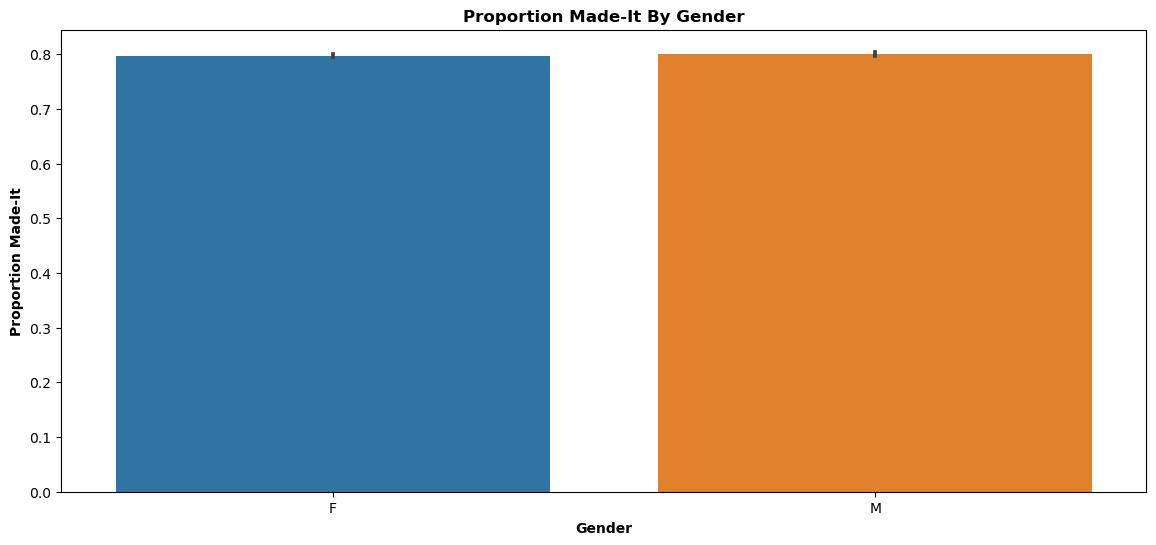

In [24]:
#graph results
createPlot(df, 'gender', 'made-it')

Gender does not seem to have special impact on whether patient shows up or not, since 79.6% of female and 80% of men make it to their appointments

In [25]:
#calculate proportion of patients that made it to appointment based on whether they are part of Bolsa programme

calculateProportions(df, 'scholarship', 'made-it')

,made-it
scholarship,
0,0.801934
1,0.762637


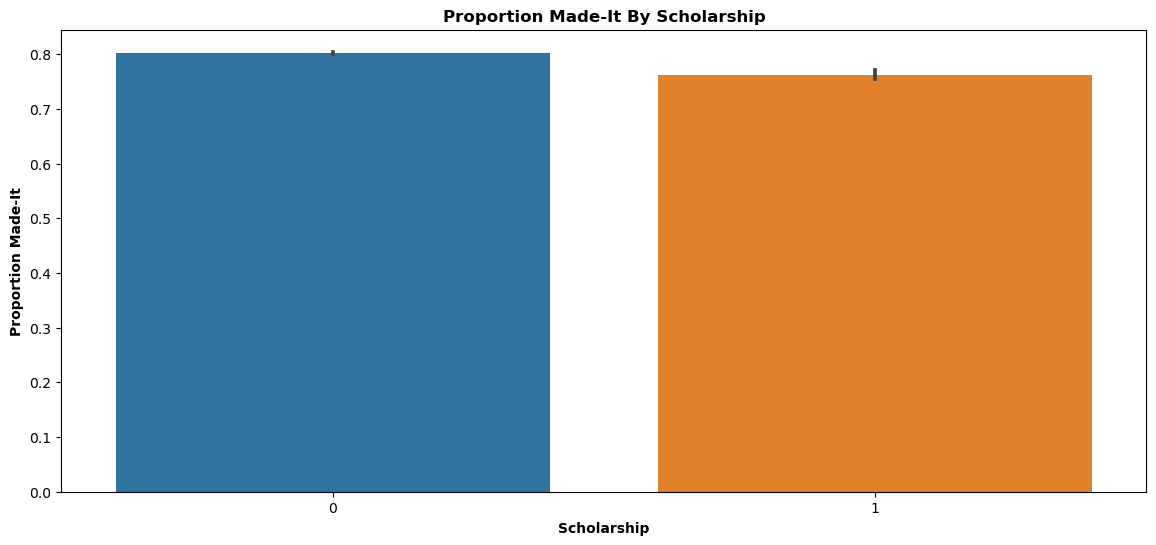

In [26]:
#graph results
createPlot(df, 'scholarship', 'made-it')

There is 3%p bigger chance that someone that has Bolsa-scholarship will not show up for their appointment 

In [27]:
#calculate proportion of patients that made it to appointment based on hipertension

calculateProportions(df, 'hipertension', 'made-it')

,made-it
hipertension,
0,0.79097
1,0.82698


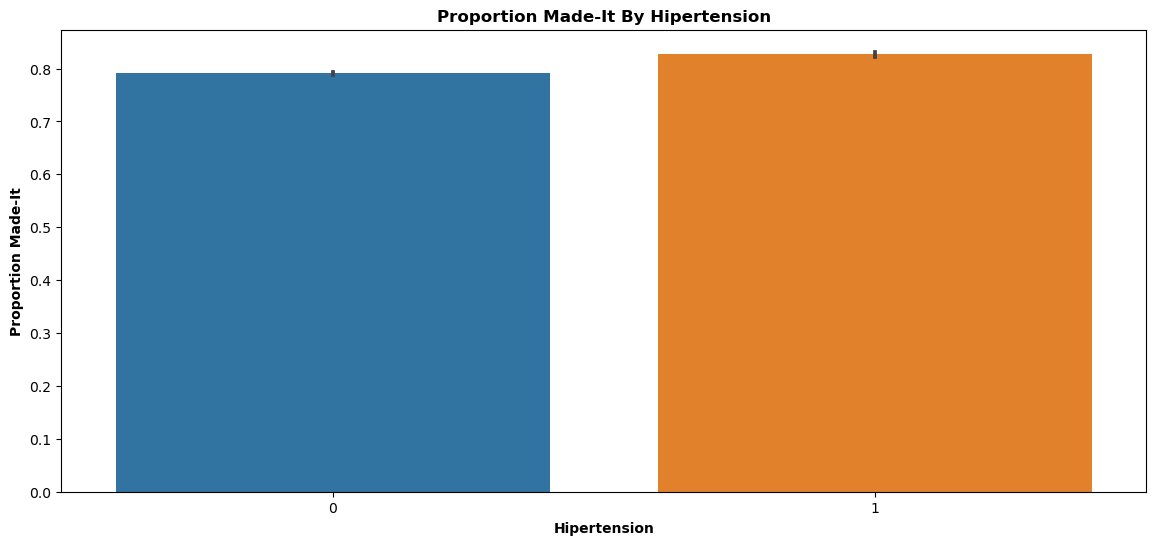

In [28]:
#graph results
createPlot(df, 'hipertension', 'made-it')

Patients that are suffering from hypertension are actually showing up for their appointments more rigorously and are not missing them

In [29]:
#calculate proportion of patients that made it to appointment based on alcoholism

calculateProportions(df, 'alcoholism', 'made-it')

,made-it
alcoholism,
0,0.798059
1,0.798512


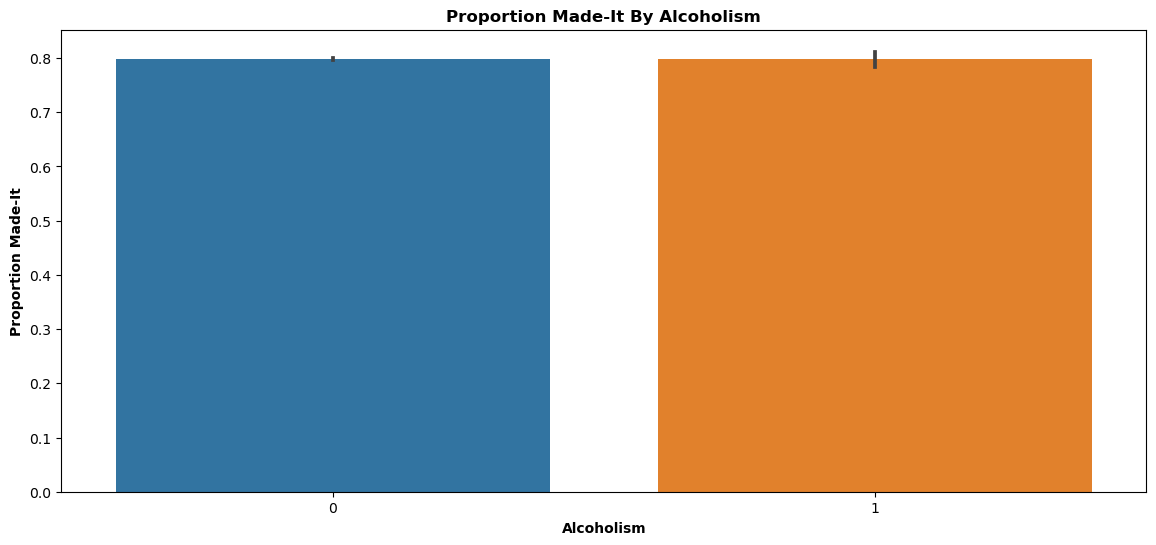

In [30]:
#graph results
createPlot(df, 'alcoholism', 'made-it')

Alcoholism also does not influence whether patient will show up or not, the numbers are pretty similar to that of overall population

In [31]:
#calculate proportion of patients that made it to appointment based on handcap
calculateProportions(df, 'handcap', 'made-it')

,made-it
handcap,
0,0.797652
1,0.820764
2,0.797814
3,0.769231
4,0.666667


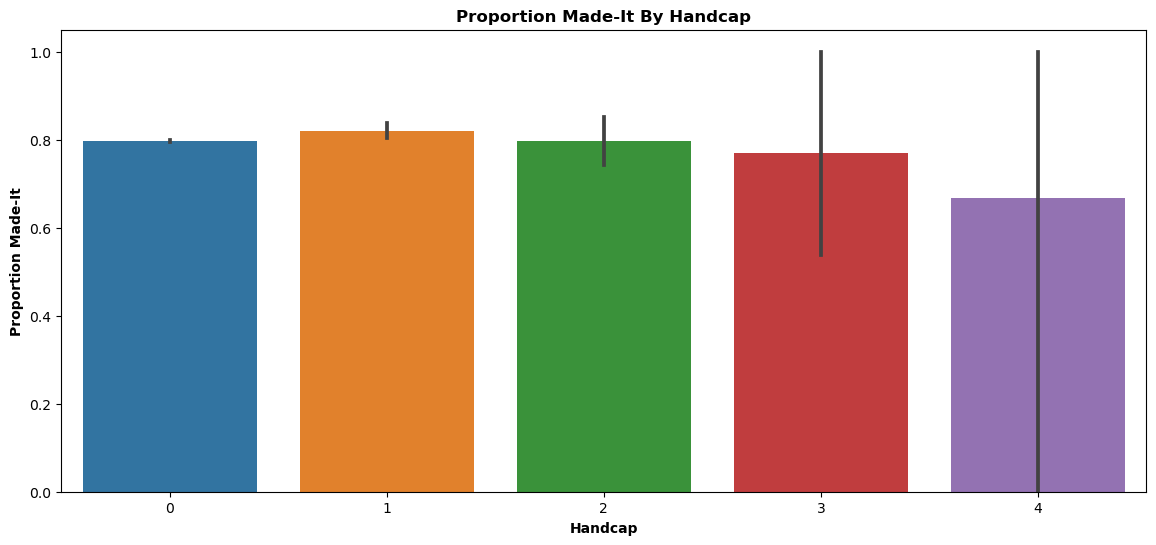

In [32]:
#graph results
createPlot(df, 'handcap', 'made-it')

In [33]:
df['handcap'].value_counts()

0    108284
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

Show-up proportions for patients that have are disabled in two or more ways are declining 
Although we see that count of such patients is also declining rapidly (183 patients with 2 form of disability and 13 with 3), it might be good idea to take accessibility factor into account for handicapped patients

In [34]:
#calculate proportion of patients that made it to appointment based on scheduledgroup

calculateProportions(df, 'scheduledgroup', 'made-it')

,made-it
scheduledgroup,
the same or next day,0.953430
<1 week,0.764994
<2 weeks,0.723630
<1 month,0.670906
>1 month,0.678159


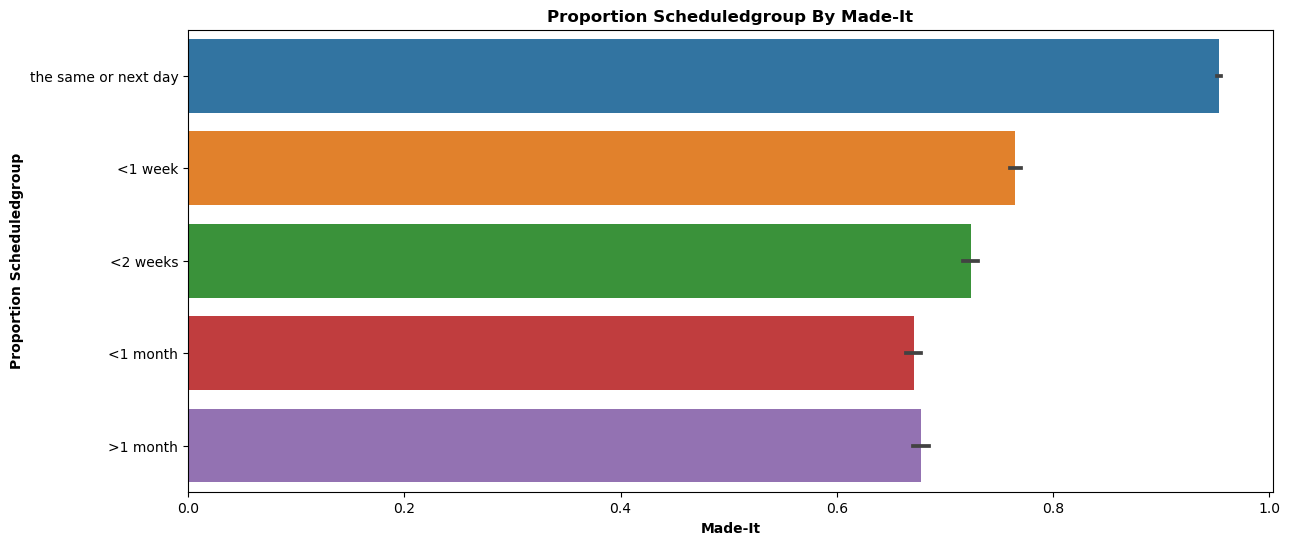

In [35]:
#graph results
createPlot(df, 'made-it', 'scheduledgroup', orient='h')

There is a very clear tendency that patients do not show up more often, as more time passes between the day they've scheduled the appointment and actual appointment day

In [36]:
#calculate proportion of patients that made it to appointment based on sms_received

calculateProportions(df, 'sms_received', 'made-it')

,made-it
sms_received,
0,0.832976
1,0.724255


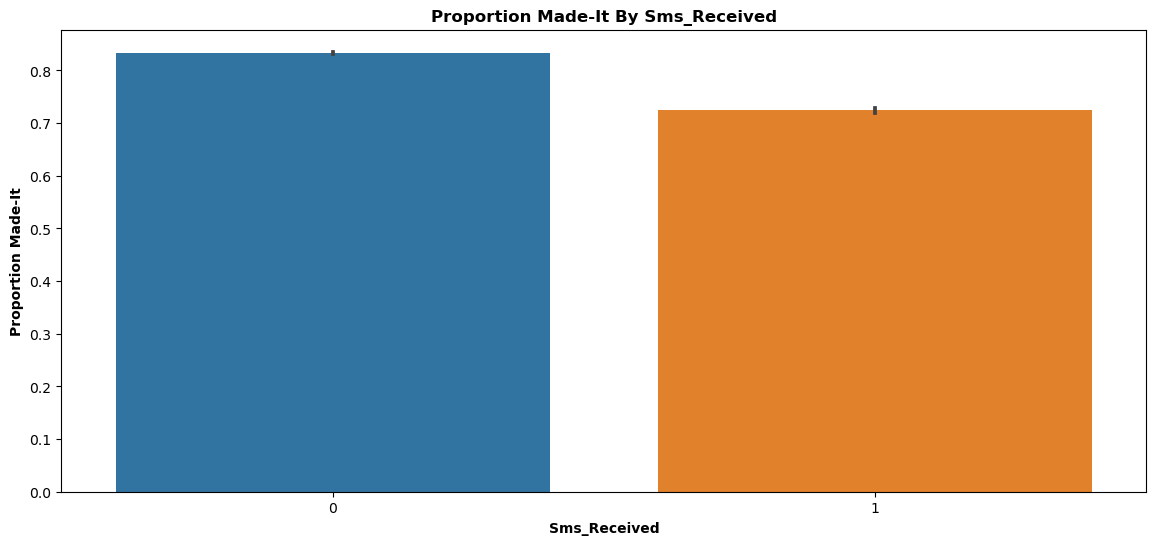

In [37]:
#graph results
createPlot(df, 'sms_received', 'made-it')

These results were actually **quite surprising** to me and I decided to explore these results further

In [38]:
#create pivot based on difference between scheduled day and appointment day
scheduled_sms_group_impact = pd.pivot_table(data = df, index = ["scheduledgroup","sms_received"], values = "made-it").reset_index()
print(scheduled_sms_group_impact)
heatmap_data = scheduled_sms_group_impact.pivot(index="scheduledgroup", columns="sms_received", values="made-it")

         scheduledgroup  sms_received   made-it
0  the same or next day             0  0.953430
1               <1 week             0  0.763292
2               <1 week             1  0.769870
3              <2 weeks             0  0.698231
4              <2 weeks             1  0.740601
5              <1 month             0  0.628809
6              <1 month             1  0.699691
7              >1 month             0  0.634107
8              >1 month             1  0.704741


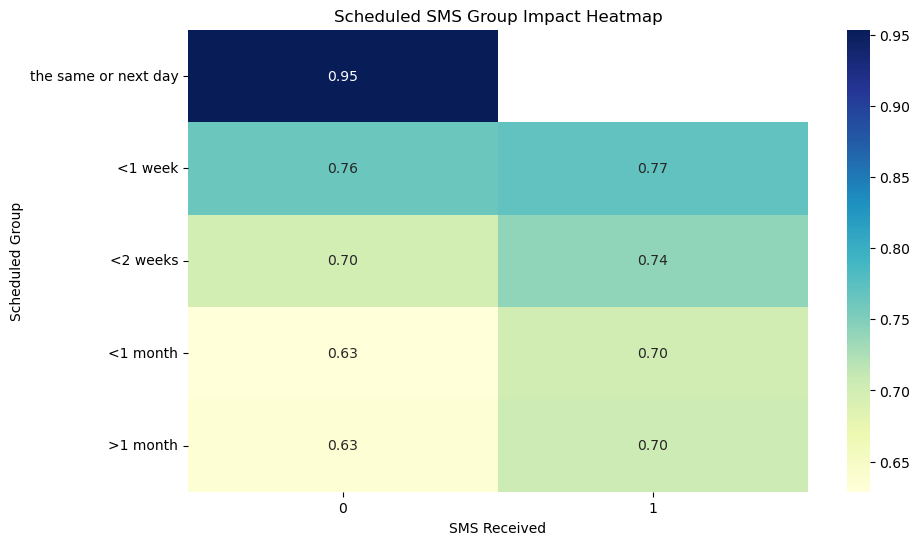

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Scheduled SMS Group Impact Heatmap")
plt.xlabel("SMS Received")
plt.ylabel("Scheduled Group")
plt.show()

>95% of patients are showing up for the appointment that's on the same or the next day


>the proportion is declining with every bucket, nevertheless it's clear that sending a reminder to patients that have more than 2 weeks between scheduled day and appointment day results in a bigger chance of them showing up

In [40]:
#calculate proportion of patients that made it based on weekday of appointment
calculateProportions(df, 'apointmentweekday', 'made-it')

,made-it
apointmentweekday,
Friday,0.787739
Monday,0.793519
Saturday,0.769231
Thursday,0.806506
Tuesday,0.799064
Wednesday,0.803108


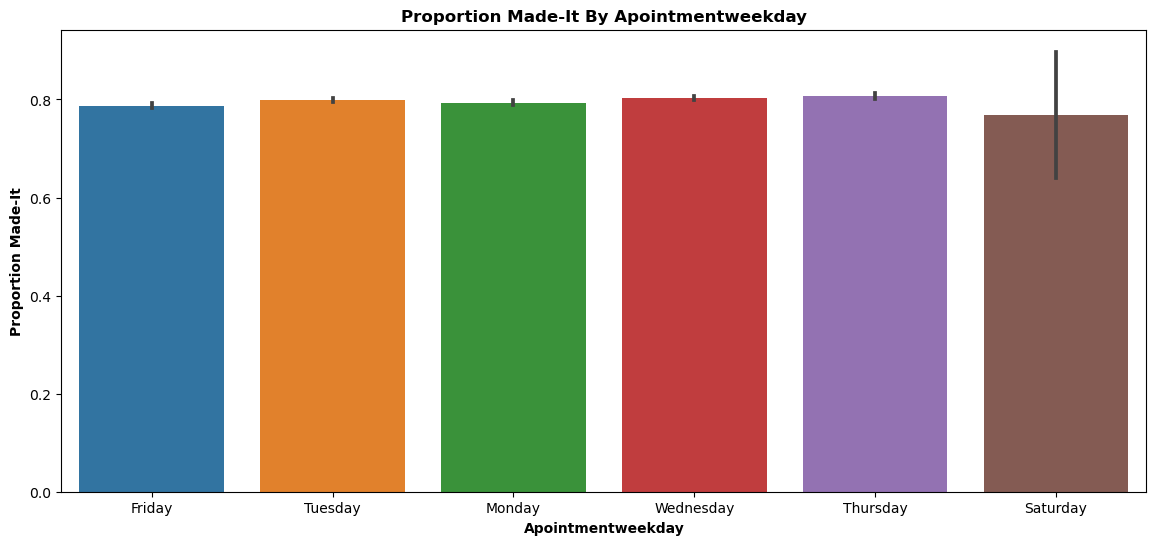

In [41]:
#graph results
createPlot(df, 'apointmentweekday', 'made-it', order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])

In [42]:
df["apointmentweekday"].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17246
Saturday        39
Name: apointmentweekday, dtype: int64

The numers are pretty stable throughout the week and remain fairly close to the overall proportion - patients have bigger tendency of not showing up for their appointmens on Saturday, nevertheless number of visits is very low one compared to other days

In [43]:
#calculate proportion of patients that made it to appointment based on agegroup
calculateProportions(df, 'agegroup', 'made-it')

,made-it
agegroup,
Infant,0.818651
Toddler,0.831044
Kid,0.774746
Teen,0.733565
Young Adult,0.753511
30+,0.782480
40+,0.797312
50+,0.825002
60+,0.847026


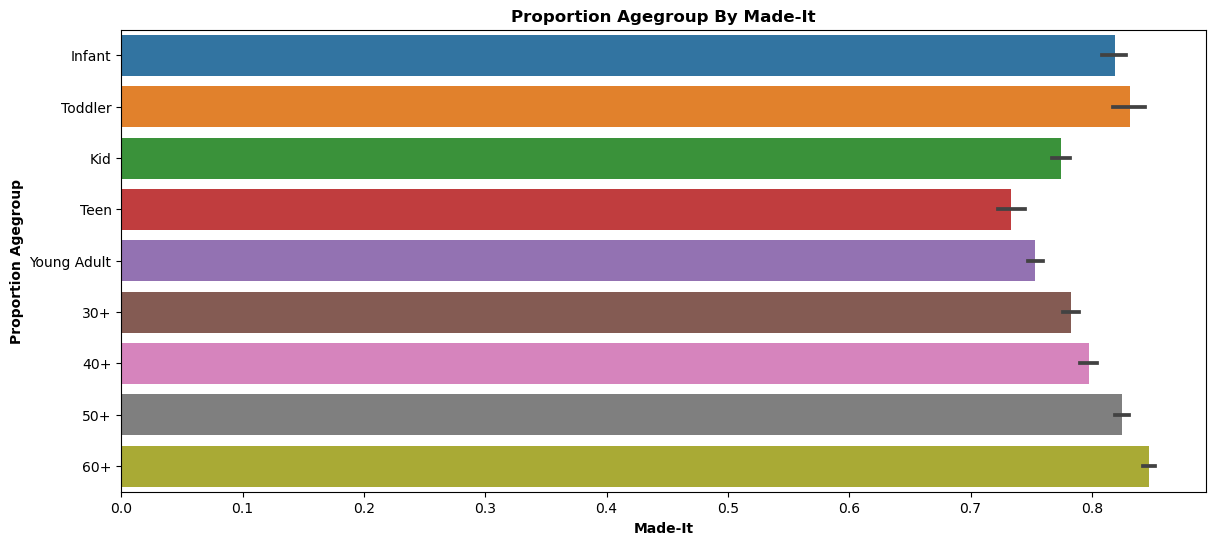

In [44]:
#graph results
createPlot(df, 'made-it', 'agegroup', orient='h')

We see the lowest attendance in teenagers - maybe it might be good idea to send reminders to their parents? 

In [47]:
id_impact = pd.pivot_table(data=df, index='patientid', values=['made-it', 'sms_received'], aggfunc={'made-it': 'mean', 'sms_received': 'sum'})

# Rename the columns
id_impact = id_impact.rename(columns={'made-it': 'mean_made-it', 'sms_received': 'count_sms_received'})

# Add a new column for count of 'patientid'
id_impact['count_patientid'] = df.groupby('patientid')['patientid'].count()

# Reset the index to make 'patientid' a regular column
id_impact = id_impact.reset_index()

# Display the resulting DataFrame
#print(id_impact)

id_impact = id_impact[(id_impact["mean_made-it"]<0.5)&(id_impact["count_patientid"]>=5)]
print(id_impact)

             patientid  mean_made-it  count_sms_received  count_patientid
91       1122443646527      0.400000                   1                5
150    112873513999765      0.400000                   2                5
283      1144471549922      0.000000                   0                6
407        11595147151      0.400000                   1                5
759      1198157171975      0.478261                   0               23
...                ...           ...                 ...              ...
61566    9919614752526      0.200000                   4                5
62027  997225572527538      0.333333                   1                6
62161   99871477366383      0.250000                   3                8
62244    9995994929266      0.181818                   0               11
62254   99966898398164      0.400000                   1                5

[250 rows x 4 columns]


In [48]:
sms_sent_proportion = id_impact["count_sms_received"].sum()/id_impact["count_patientid"].sum()
print(sms_sent_proportion)

0.28681253696037845


I have also identified 250 patients that have made an appointment 5 or more times and showed up for less than half of them. We also saw in analysis that sending a reminder increases chances of patient showing up - maybe we should target at least these patients and make sure that they are being reminded of their visit or, if possible, call them? 

## Conclusion

As conclusion for this analysis, let's answer 4 question that I've posed at the beginning:
1. Is there a difference between scheduled day and appointment day - do patients that make an appointment much in advance tend not to show up? 
>Yes, there is visible drop in proportions of "no-shows" the more in advance patient made an appoitment
2. Is alcoholism influencing whether patients show up more often or not? 
>No
3. Are we increasing chances of patient showing up if we're sending reminders?
>Yes, it increases chances of patient showing up for the appointment by ca. 7%p when patient made the appointment more than 2 weeks in advance
4. Are there any patients that have a pattern of not showing up? Should we focus on some patients and send them reminders about the visit? 
>I've identified ca. 1000 patients that made at least 5 appointments and showed up for less than 50% of them. Reminders were sent only in 28% of the visits - it might be a good idea to either implement a system that will send reminders to everyone or focus on these patients that have a big tendency of not showing up

Overall, we can see that what might have the biggest impact on whether patient shows up for his/her appointment is the time that passed between the day they've scheduled it on and appointment day. We can increase chances of a patient showing up by sending them message with a reminder. Teenagers are also slacking on showing up - well, to be again young and careless... Nevertheless it might be good idea to consider also sending some reminders to their guardians if possible?
Last but not least, we've also seen that what has a big impact is number of disabilities that patient is experiencing, which may influence their ability of actually getting to the facility



There are numbers of ways this could be explored further - for example do these patients that have a tendency of not showing up, show up more often when they receive a reminder? Do they have any form of disability? 